In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 파일 경로 및 이름 설정
folder_path = ''
files = [
    '갤럭시_s21_출시_전.csv',
    '갤럭시_s21_출시_후.csv',
    '갤럭시_s22_출시_전.csv',
    '갤럭시_s22_출시_후.csv',
    '갤럭시_s23_출시_전.csv',
    '갤럭시_s23_출시_후.csv',
    '갤럭시_zf3_출시_전.csv',
    '갤럭시_zf3_출시_후.csv',
    '갤럭시_zf4_출시_전.csv',
    '갤럭시_zf4_출시_후.csv',
    '갤럭시_zf5_출시_전.csv',
    '갤럭시_zf5_출시_후.csv',
    '아이폰_13_출시_전.csv',
    '아이폰_13_출시_후.csv',
    '아이폰_14_출시_전.csv',
    '아이폰_14_출시_후.csv',
    '아이폰_15_출시_전.csv',
    '아이폰_15_출시_후.csv'
]

# 데이터 프레임 로드
dataframes = {}
for file in files:
    path = os.path.join(folder_path, file)
    dataframes[file] = pd.read_csv(path)

# 연도별로 모델 그룹화
yearly_models = {
    "2021": ["갤럭시_s21", "갤럭시_zf3", "아이폰_13"],
    "2022": ["갤럭시_s22", "갤럭시_zf4", "아이폰_14"],
    "2023": ["갤럭시_s23", "갤럭시_zf5", "아이폰_15"]
}

# 연도별 평균 조회수 증가율 계산
yearly_avg_increase_rates = {}
for year, models in yearly_models.items():
    yearly_avg_increase_rates[year] = {}
    for model in models:
        pre_release_file = next((f for f in dataframes if f.endswith(f"{model}_출시_전.csv")), None)
        post_release_file = next((f for f in dataframes if f.endswith(f"{model}_출시_후.csv")), None)

        if pre_release_file and post_release_file:
            df_pre_release = pd.read_csv(os.path.join(folder_path, pre_release_file))
            df_post_release = pd.read_csv(os.path.join(folder_path, post_release_file))

            yearly_avg_increase_rates[year][model] = {"pre_release": df_pre_release.groupby('video_id').mean('view_count_increase_rate')['view_count_increase_rate'].mean(), 
                                                      "post_release": df_post_release.groupby('video_id').mean('view_count_increase_rate')['view_count_increase_rate'].mean()}
            

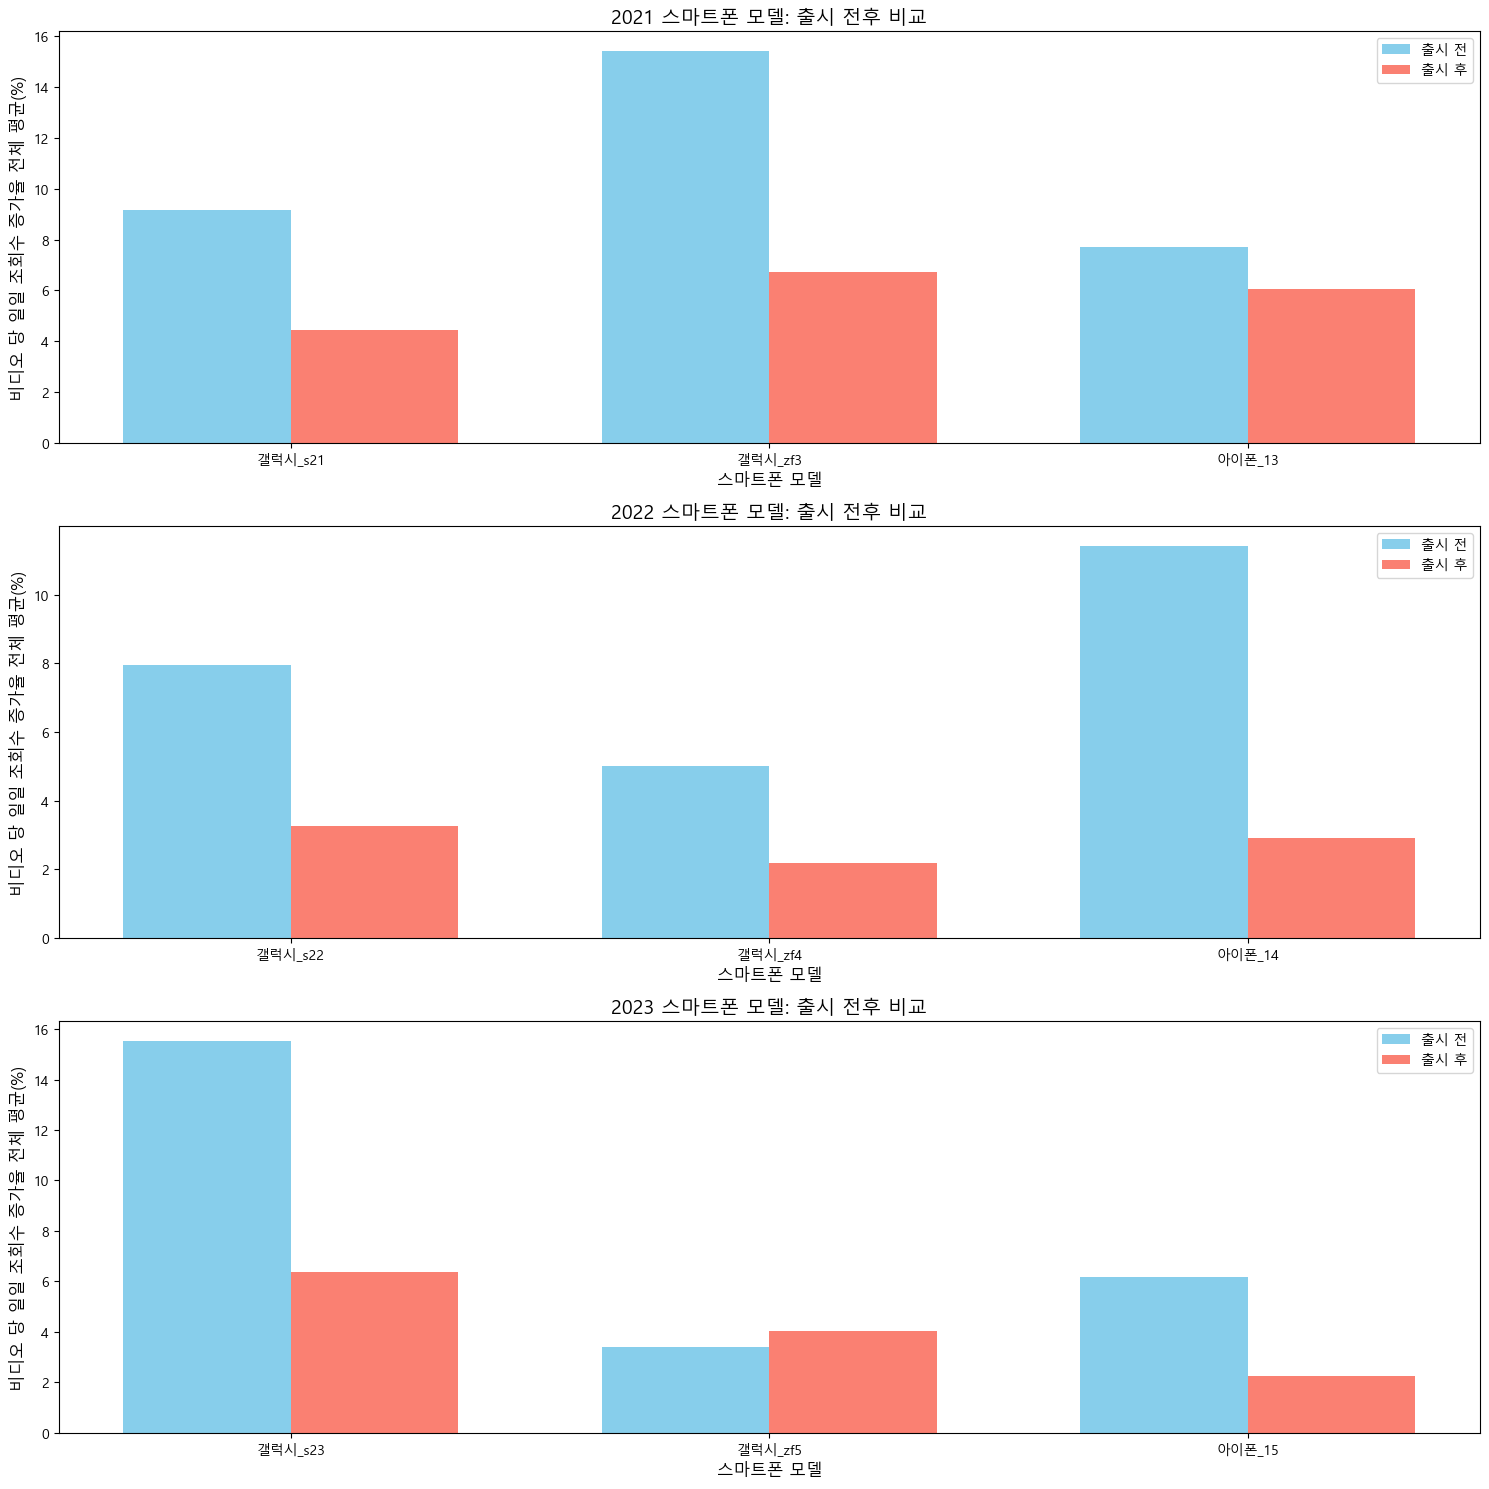

In [3]:
## 시각화
fig, axes = plt.subplots(len(yearly_models), 1, figsize=(15, 15), dpi=100)

for i, (year, models) in enumerate(yearly_avg_increase_rates.items()):
    ax = axes[i] if len(yearly_models) > 1 else axes
    model_names = list(models.keys())
    pre_release_rates = [models[model]["pre_release"] for model in model_names]
    post_release_rates = [models[model]["post_release"] for model in model_names]

    bar_width = 0.35
    index = range(len(model_names))

    bar1 = ax.bar(index, pre_release_rates, bar_width, label='출시 전', color='skyblue')
    bar2 = ax.bar([i + bar_width for i in index], post_release_rates, bar_width, label='출시 후', color='salmon')

    ax.set_xlabel('스마트폰 모델', fontsize=12)
    ax.set_ylabel('비디오 당 일일 조회수 증가율 전체 평균(%)', fontsize=12) 
    ax.set_title(f'{year} 스마트폰 모델: 출시 전후 비교', fontsize=14)
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(model_names, fontsize=10)
    ax.legend()

plt.tight_layout()
plt.show()